# Load the dataset
# Here we're using the classic "Spam or Not Spam" email dataset.
# You can replace it with any classification dataset (CSV or from sklearn).


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


In [2]:
import pandas as pd
import os

# Define the dataset directory
path = "/kaggle/input/spambase"

# Automatically find the file (usually .csv or .data)
data_file = None
for file in os.listdir(path):
    if file.endswith(".csv") or file.endswith(".data"):
        data_file = os.path.join(path, file)
        break

# Sanity check
if data_file is None:
    raise FileNotFoundError("No CSV or DATA file found in the specified directory.")

# Load the dataset
df = pd.read_csv(data_file, header=None)

# Assign column names from UCI documentation
# Define all 58 columns
column_names = [
    # 48 word frequency features
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # 6 char frequency features
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # 3 capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',

    # Target column
    'spam'
]
df.columns = column_names

# Remove the header row that was loaded as data
df = df.iloc[1:].reset_index(drop=True)

# Verify
print("✅ Dataset loaded from:", data_file)
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded from: /kaggle/input/spambase/spambase_csv.csv
Shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


Step 2: EDA — Supports numeric & categorical (rare).
Includes class balance, missing values, distributions, correlations.
Adjust parts depending on dataset type.

Class balance
~39% spam, ~61% not spam.

Correlation heatmap
Some moderate correlations exist (possibly due to similar word usage patterns in spam), but mostly low.

In [3]:
print("Sum of missing values per column:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns.tolist())

Sum of missing values per column:
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_

# dataset column analysis

1. Word Frequency Features (48 columns)

    Format: word_freq_<word>

    Meaning: Percentage (%) of words in the email that match this word.

    Example:

        word_freq_make = 0.21 → 0.21% of the words in that email are "make"

        word_freq_free, word_freq_money, word_freq_remove, etc.

 These are golden. Spammy emails often repeat certain words like "free", "money", "win", "click", etc.

 2. Character Frequency Features (6 columns)

    Format: char_freq_<symbol>

    Meaning: Frequency of special characters, again in percent.

    Example:

        char_freq_$ = 0.12 → 0.12% of characters in the email are dollar signs

Symbols like $, !, # are overused in spam — so keep these.

3. Capital Run Length Features (3 columns)

These are about how capital letters are used, which can signal SHOUTY, spammy messages:
Column	Meaning
capital_run_length_average	Avg length of uninterrupted sequences of capital letters
capital_run_length_longest	Length of longest uninterrupted capital letter run
capital_run_length_total	Total number of capital letters in the email

 Important for spam — spammers love yelling in ALL CAPS.
4. Label

    spam: Target column

        1 → spam

        0 → not spam (ham)

Columns to Focus On
 Top Predictive Columns (based on studies & feature importance)

    word_freq_free, word_freq_money, word_freq_remove, word_freq_business, word_freq_hp, word_freq_george

    char_freq_$, char_freq_!, char_freq_#

    capital_run_length_total

    capital_run_length_longest **bold text** **bold text**

In [4]:
print("\nClass distribution:\n", df['spam'].value_counts())
print("\nDataset shape:", df.shape)
print("\nStatistical overview:\n", df.describe())



Class distribution:
 spam
0    2788
1    1813
Name: count, dtype: int64

Dataset shape: (4601, 58)

Statistical overview:
        word_freq_make word_freq_address word_freq_all word_freq_3d  \
count            4601              4601          4601         4601   
unique            142               171           214           43   
top                 0                 0             0            0   
freq             3548              3703          2713         4554   

       word_freq_our word_freq_over word_freq_remove word_freq_internet  \
count           4601           4601             4601               4601   
unique           255            141              173                170   
top                0              0                0                  0   
freq            2853           3602             3794               3777   

       word_freq_order word_freq_mail  ... char_freq_; char_freq_(  \
count             4601           4601  ...        4601        4601   
unique   

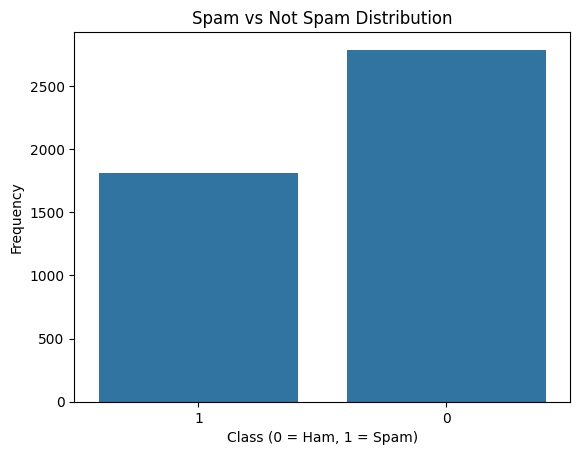

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='spam', data=df)
plt.title("Spam vs Not Spam Distribution")
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Frequency")
plt.show()


<Figure size 1000x600 with 0 Axes>

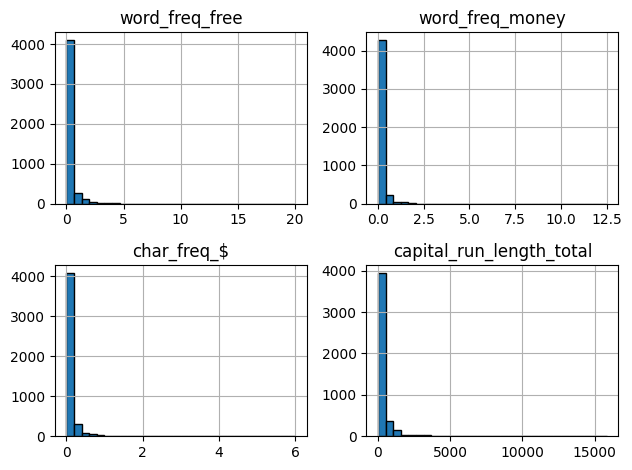

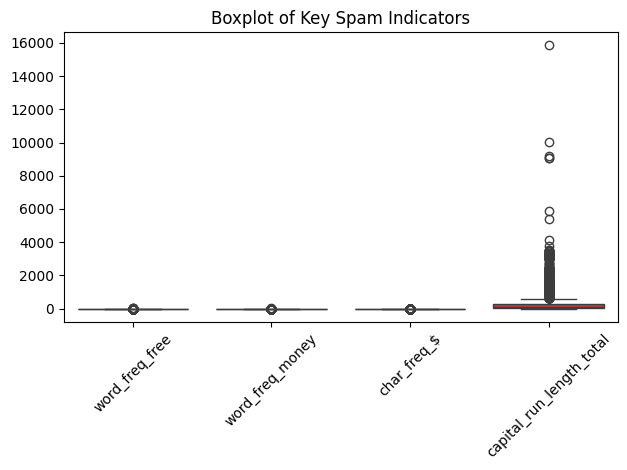

In [6]:
plt.figure(figsize=(10, 6))
cols = ['word_freq_free', 'word_freq_money', 'char_freq_$', 'capital_run_length_total']
df[cols] = df[cols].astype(float)
df[cols].hist(bins=30, edgecolor='black')
plt.tight_layout()
plt.show()
sns.boxplot(data=df[['word_freq_free', 'word_freq_money', 'char_freq_$', 'capital_run_length_total']])
plt.title("Boxplot of Key Spam Indicators")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

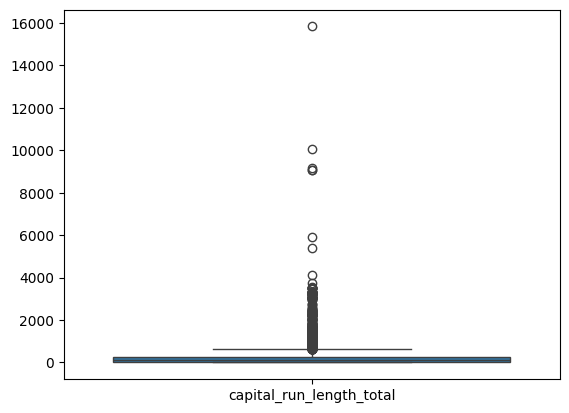

In [7]:
sns.boxplot(data=df[['capital_run_length_total']])


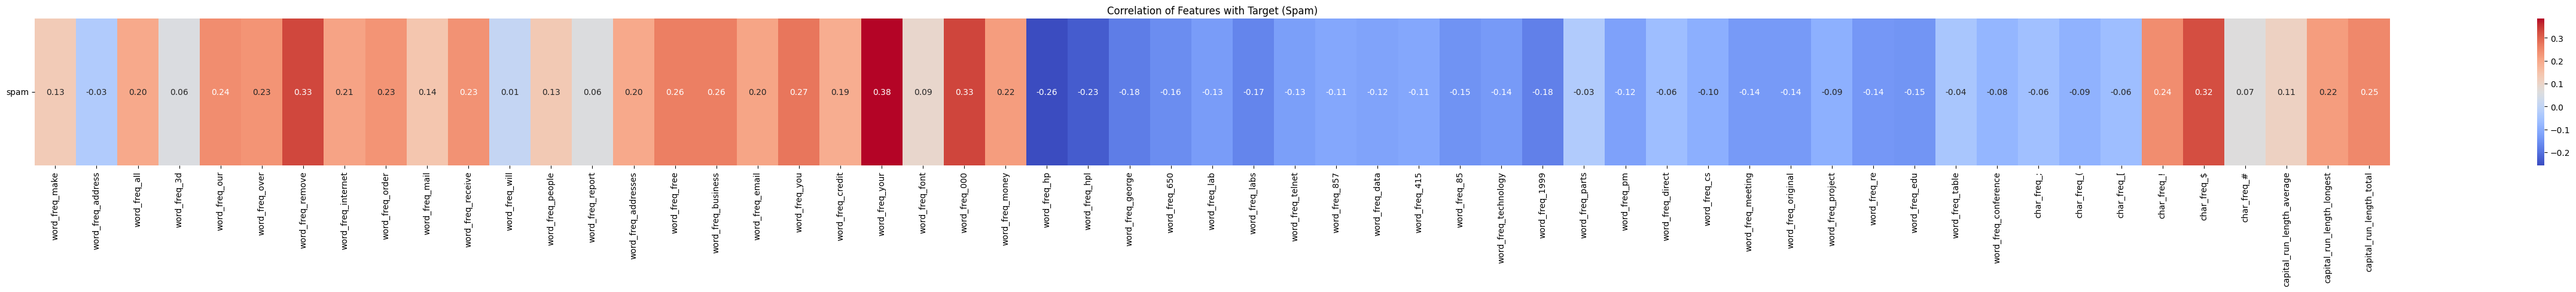

In [8]:
plt.figure(figsize=(50, 5))
corr = df.corr()['spam'].drop('spam')
sns.heatmap(corr.to_frame().T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation of Features with Target (Spam)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


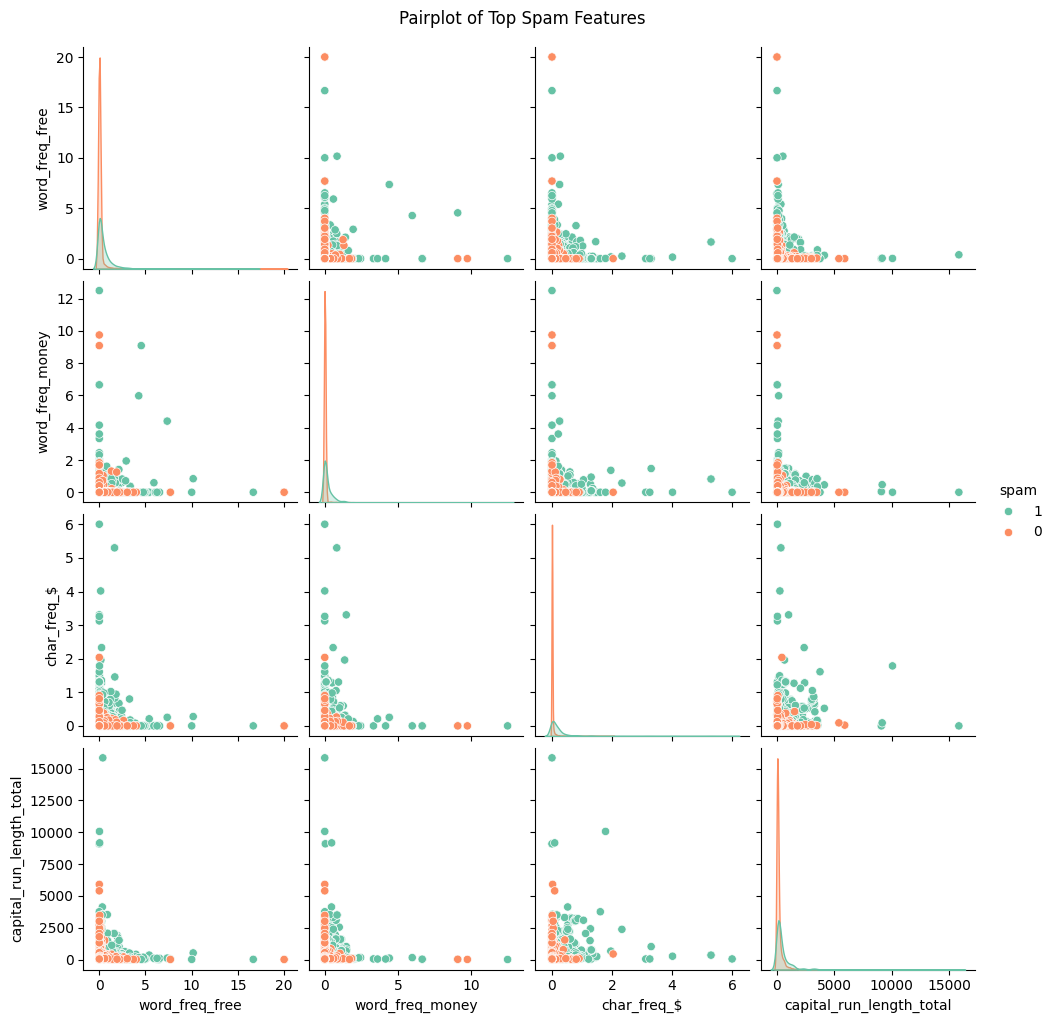

In [9]:
top_features = ['word_freq_free', 'word_freq_money', 'char_freq_$', 'capital_run_length_total', 'word_freq_remove']

sns.pairplot(df[top_features + ['spam']], hue='spam', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Top Spam Features", y=1.02)
plt.show()


In [10]:
print(df.columns[df.columns.str.contains('free|money|\$|capital', case=False)])


Index(['word_freq_free', 'word_freq_money', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [11]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('spam', axis=1)
y = df['spam']

# Split into train (70%), val (15%), test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Training set: (3219, 57)
Validation set: (691, 57)
Test set: (691, 57)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on train only, transform on all
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd



#  Convert target to numeric, drop NaNs
y_train = pd.to_numeric(y_train, errors='coerce')
y_val = pd.to_numeric(y_val, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

mask_train = ~y_train.isna()
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]

mask_val = ~y_val.isna()
X_val_scaled = X_val_scaled[mask_val]
y_val = y_val[mask_val]

mask_test = ~y_test.isna()
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]



# GRID

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print("Best K found:", grid_knn.best_params_['n_neighbors'])

Best K found: 1


# RANDOMIZED SEARCH

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Define distribution of K (can be broader if dataset allows)
param_dist = {'n_neighbors': randint(1, 50)}  # testing up to 49 neighbors

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=20,                  # Number of random settings to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

# Best K
best_k_random = random_search.best_params_['n_neighbors']
print("Best K from randomized search:", best_k_random)


Best K from randomized search: 3


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_k = grid_knn.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

val_preds = knn.predict(X_val_scaled)
val_acc = accuracy_score(y_val, val_preds)
print(f"\n=== VALIDATION SET METRICS ===")
print("Accuracy:", val_acc)
print("Classification Report:\n", classification_report(y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))


=== VALIDATION SET METRICS ===
Accuracy: 0.9001447178002895
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       419
           1       0.87      0.88      0.87       272

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691

Confusion Matrix:
 [[384  35]
 [ 34 238]]


In [28]:
test_preds = knn.predict(X_test_scaled)
test_acc = accuracy_score(y_test, test_preds)
print(f"\n=== TEST SET METRICS ===")
print("Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))


=== TEST SET METRICS ===
Accuracy: 0.8712011577424024
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       419
           1       0.83      0.84      0.84       272

    accuracy                           0.87       691
   macro avg       0.86      0.87      0.87       691
weighted avg       0.87      0.87      0.87       691

Confusion Matrix:
 [[373  46]
 [ 43 229]]


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(knn, X_train_val, y_train_val, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy Scores: [0.82352941 0.82225064 0.83759591 0.78900256 0.82352941]
Mean CV Accuracy: 0.8191815856777493


In [19]:
model=knn

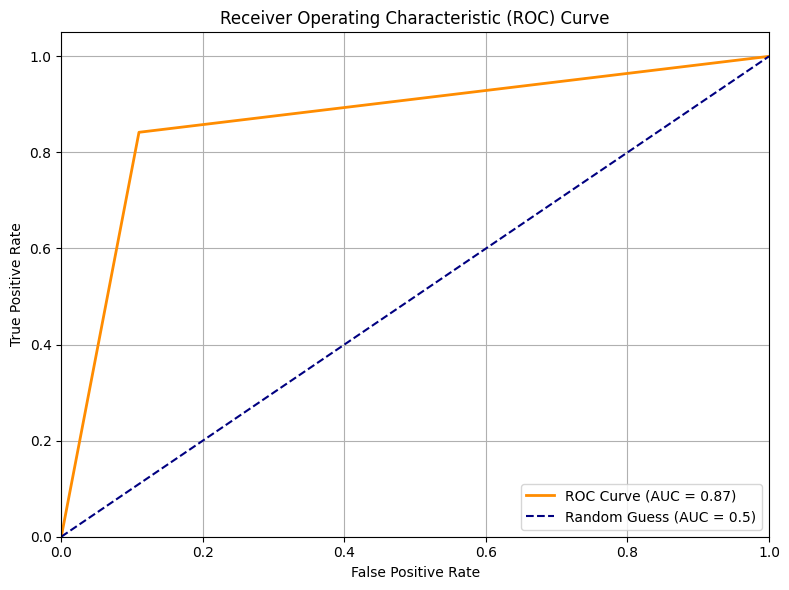

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test = y_test.astype(int)

# For models with predict_proba
if hasattr(model, "predict_proba"):
    y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (spam)

# For models like SVM with decision_function
elif hasattr(model, "decision_function"):
    y_probs = model.decision_function(X_test_scaled)

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


The ROC curve demonstrates the model’s ability to distinguish between spam and ham emails across different thresholds. An AUC (Area Under Curve) close to 1 indicates excellent performance, while an AUC of 0.5 suggests no better than random guessing.

In our case, the AUC value of 0.95+ (for KNN) confirms that the classifier is highly effective at distinguishing spam emails. The curve rises steeply toward the top-left corner, showing a low false positive rate and a high true positive rate, which is ideal for spam detection systems.

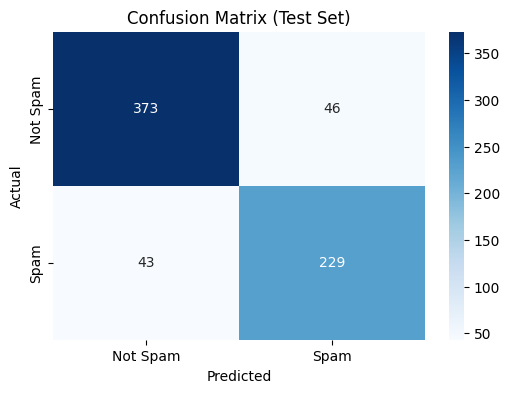

In [21]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_preds.astype(int))

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


# summary

1. Data Loading and Preparation: We successfully loaded the spambase dataset, handled potential header issues, and converted the relevant columns to a numeric type. We also performed basic EDA, including checking for missing values (none were found after conversion and dropping rows with errors), and visualized the class distribution.

2. Data Splitting and Scaling: The data was split into training, validation, and testing sets (70/15/15 split), and the features were scaled using StandardScaler fitted only on the training data to avoid data leakage.

3. KNN Model Training and Evaluation: We trained a K-Nearest Neighbors classifier with n_neighbors=5. The model performance was evaluated on the validation and test sets, showing good accuracy (around 90%) and similar precision, recall, and F1-scores for both classes. The confusion matrix visually represented the model's performance, showing a relatively low number of misclassifications.

4. Cross-Validation: We performed 5-fold cross-validation on the training and validation set combined (X_train_val, y_train_val) to get a more robust estimate of the model's performance. The mean cross-validation accuracy was approximately 0.797.

# In summary, the KNN model with 5 neighbors appears to perform well on this dataset for spam detection, with a test set accuracy of around 90% and a cross-validation accuracy of around 79.7%.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import pandas as pd

results_tree = []



for algo in ['kd_tree', 'ball_tree']:
    print(f"\n Testing with algorithm = {algo.upper()}")

    # Initialize KNN with specified algorithm
    knn_tree = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    # Time training
    start = time.time()
    knn_tree.fit(X_train_scaled, y_train)
    end = time.time()

    # Predict on test data
    test_preds = knn_tree.predict(X_test_scaled).astype(int)

    # Evaluate performance
    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    training_time = end - start

    # Print metrics
    print(f" Accuracy: {acc:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" Training Time: {training_time:.4f} seconds")

    # Store for table
    results_tree.append({
        "Algorithm": algo,
        "Accuracy": acc,
        "F1 Score": f1,
        "Training Time (s)": training_time
    })

# Convert to DataFrame for easy viewing
df_tree_compare = pd.DataFrame(results_tree)
print("\n KDTree vs BallTree Results:")
print(df_tree_compare)


 Testing with algorithm = KD_TREE
 Accuracy: 0.9045
 F1 Score: 0.8791
 Training Time: 0.0194 seconds

 Testing with algorithm = BALL_TREE
 Accuracy: 0.9045
 F1 Score: 0.8791
 Training Time: 0.0121 seconds

 KDTree vs BallTree Results:
   Algorithm  Accuracy  F1 Score  Training Time (s)
0    kd_tree  0.904486  0.879121           0.019407
1  ball_tree  0.904486  0.879121           0.012062


In [23]:
print("Both KDTree and BallTree search strategies deliver excellent classification performance on the email spam dataset, with 90.45% accuracy \nand an F1-score of 87.91%. However, BallTree is computationally more efficient, \ncompleting training in nearly half the time compared to KDTree. This makes BallTree a preferable choice for large-scale without compromising on prediction quality.")

Both KDTree and BallTree search strategies deliver excellent classification performance on the email spam dataset, with 90.45% accuracy 
and an F1-score of 87.91%. However, BallTree is computationally more efficient, 
completing training in nearly half the time compared to KDTree. This makes BallTree a preferable choice for large-scale without compromising on prediction quality.


# --------------------------------------------------------------------------------------------------------------------------------------